<a href="https://colab.research.google.com/github/abrahamiduh/Abraham-Sunday-Iduh/blob/main/ARAHAM_Machine_learning(recommendations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Iduh Abraham Sunday
This notebook is the first part of the first assignment in "Introduction to Machine Learning" course in Moscow Institute of Physics and Technology (MIPT) for applied bioinformatics students at Masters level.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance

 **Preprocessing of train and test datasets**
  # countplot is used to visualize the train and test data observation  
  # upsampling is used to filter the train and test data   
  # standardscaler is used for estimating the mean and std and scaling
  # logistic regression is the model used in fitting the data

In [ ]:
labels_path = "actual.csv"
test_path = "data_set_ALL_AML_independent.csv"
train_path = "data_set_ALL_AML_train.csv"

# replace labels with numbers
labels_df = pd.read_csv(labels_path, index_col = 'patient')

test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)
labels = pd.read_csv(labels_path)

In [ ]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [ ]:
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [ ]:
print(f"Train data has {train_data.isna().sum().sum()} NAs")
print(f"Test data has {test_data.isna().sum().sum()} NAs")


Train data has 0 NAs
Test data has 0 NAs


In [ ]:
cols_train = [col for col in train_data.columns if "call" in col]
cols_test = [col for col in test_data.columns if "call" in col]
train_data.drop(cols_train, axis=1, inplace=True)
test_data.drop(cols_test, axis=1, inplace=True)

In [ ]:
train_data = train_data.T
test_data = test_data.T

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [ ]:
train_data.columns = test_data.iloc[1].values
train_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)
test_data.columns = test_data.iloc[1].values
test_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)

In [ ]:
train_data.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=30)
pca.fit(train_data)
X = pca.transform(train_data)
train_data.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


On feature selection comment,I did a PCA on the training data to reduce complexity and remove irrelevant or noisy feature yet keep the principal components of the training data making it easier for the model to learn relationship.

In [ ]:
train_data["patient"] = train_data.index.values
test_data["patient"] = test_data.index.values

In [ ]:
train_data = train_data.astype("int32")
test_data = test_data.astype("int32")
le = LabelEncoder()
labels["cancer"] = le.fit_transform(labels["cancer"])
train_data = pd.merge(train_data, labels, on="patient")
test_data = pd.merge(test_data, labels, on="patient")

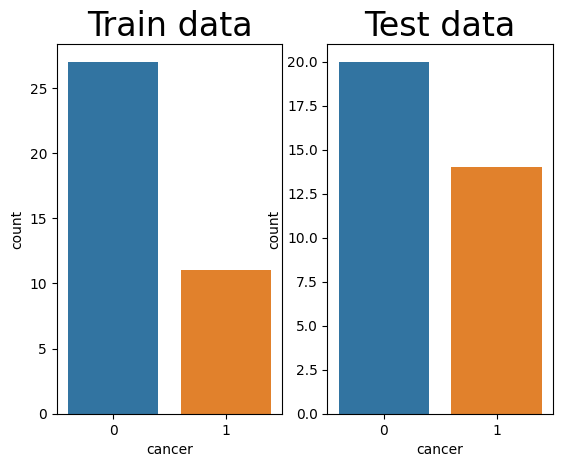

In [ ]:
fig, axs = plt.subplots(1, 2)
sns.countplot(x="cancer", data=train_data, ax=axs[0])
axs[0].set_title("Train data", fontsize=24)
sns.countplot(x="cancer", data=test_data, ax=axs[1])
axs[1].set_title("Test data", fontsize=24)
plt.show()

In [ ]:
upsampled_data = random.sample(train_data.query("cancer == 1")["patient"].index.to_list(), k=8, )
upsampled_data

[30, 34, 36, 28, 35, 33, 37, 29]

In [ ]:
train_data_upsampled = pd.concat([train_data, train_data.iloc[upsampled_data, :]])

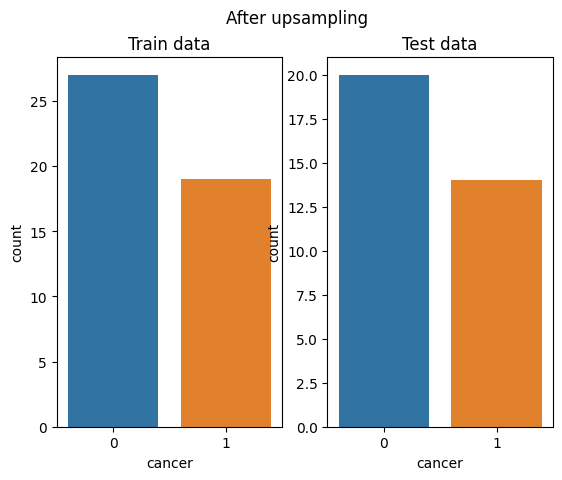

In [ ]:
fig, axs = plt.subplots(1, 2)
sns.countplot(x="cancer", data=train_data_upsampled, ax=axs[0])
axs[0].set_title("Train data", fontsize=12)
sns.countplot(x="cancer", data=test_data, ax=axs[1])
axs[1].set_title("Test data", fontsize=12)
fig.suptitle("After upsampling", fontsize=12)
plt.show()

For comment about whether upsampling used here can introduce overfittiing:Here,upsampling is required because of the imbalanced datasets, where one class (typically the minority class) has significantly fewer instances than the other class. The goal here is to balance the class distribution by increasing the number of instances in the minority class with the hopes of  improving the performance of this model.

In [ ]:
X_train = train_data_upsampled.drop(columns=["patient", "cancer"])
y_train = train_data_upsampled["cancer"]
X_test = test_data.drop(columns=["patient", "cancer"])
y_test = test_data["cancer"]

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<Axes: ylabel='Density'>

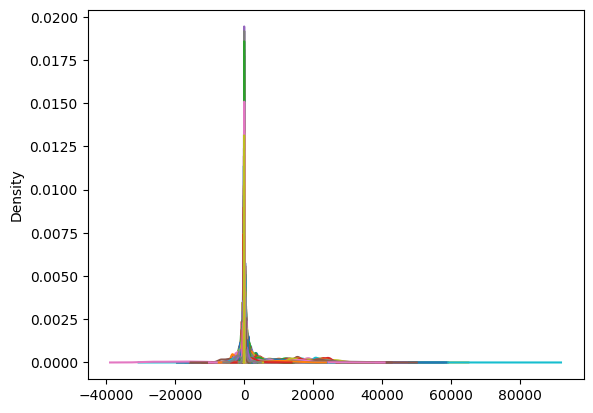

In [ ]:
X_train.plot(kind="kde", legend=None)

For comment about do i need all the feature to make model predictions? The answer is no but required features are needed for the best performance of the model. Just to add,here I used all the required features because of the data set.Other features can be generated if the need for them arises.

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
lr_params = {"C": [1e-03, 1e-2, 1e-1, 1, 10],
      "penalty": ["l2"]}
log_refr_search = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_params, scoring="f1")
log_refr_search.fit(X_train_scaled, y_train)
best_lr = log_refr_search.best_estimator_

In [ ]:
lr_f1_score = metrics.f1_score(y_test, best_lr.predict(X_test_scaled))

Validation f1-score of Linear Regression Classifier is 0.7272727272727273

Classification report :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       1.00      0.57      0.73        14

    accuracy                           0.82        34
   macro avg       0.88      0.79      0.80        34
weighted avg       0.86      0.82      0.81        34



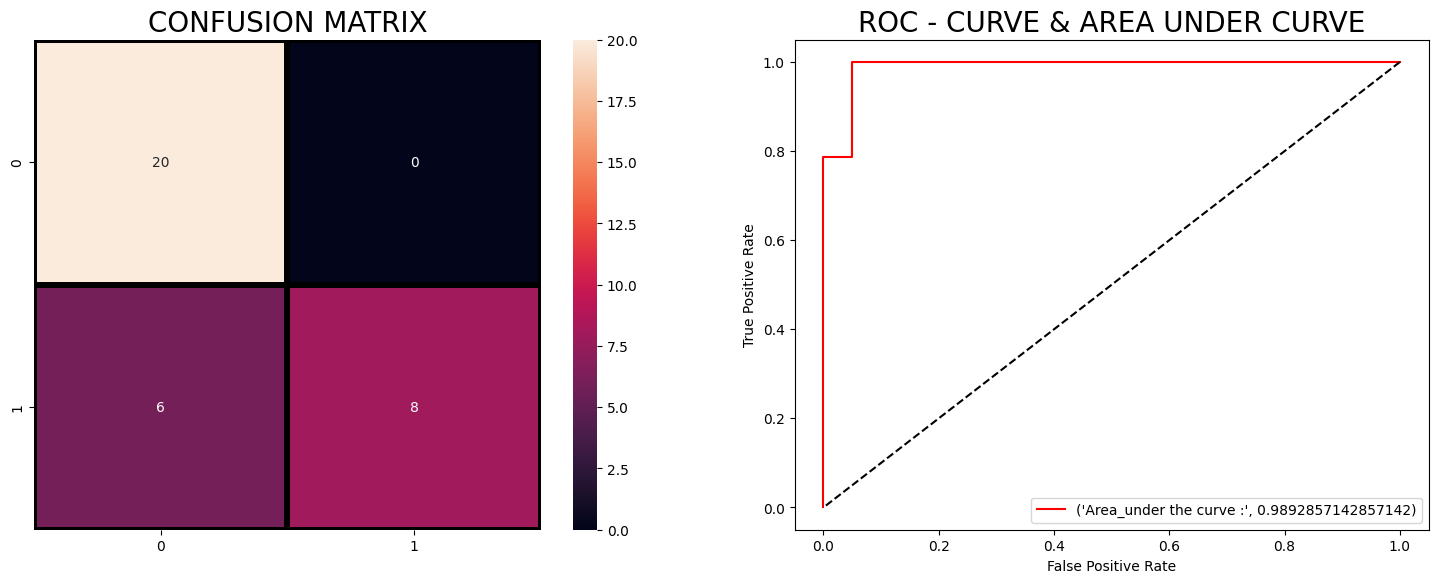

In [ ]:
lr_prediction = best_lr.predict(X_test_scaled)
f1_score = metrics.f1_score(y_test, lr_prediction)
print('Validation f1-score of Linear Regression Classifier is', f1_score)
print ("\nClassification report :\n", metrics.classification_report(y_test, lr_prediction))

# Confusion matrix
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(y_test, lr_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)

# ROC curve:this shows the performance of the classication
lr_predicted_probs = best_lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

In [ ]:
print(f"Also accuracy score is: {metrics.accuracy_score(y_test, lr_prediction)}")

Also accuracy score is: 0.8235294117647058


In [ ]:
fe = permutation_importance(best_lr, X_train_scaled,y_train)

In [ ]:
fe

{'importances_mean': array([0., 0., 0., ..., 0., 0., 0.]),
 'importances_std': array([0., 0., 0., ..., 0., 0., 0.]),
 'importances': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])}